### Importing Libraries

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv("boston_housing.csv")

X = df['rm'].values.reshape(-1, 1)
y = df['medv'].values.reshape(-1, 1)

### Feature Scaling using Standarization (Improve Calculation Time)

### Add a column of ones to our X vector, creating the Design Matrix

In [33]:
# Create a column of ones that matches the number of rows in X
ones = np.ones((np.shape(X)[0], 1))

# Concatenate the column of ones to the front of matrix X
X = np.c_[ones, X]

X[0:3]

array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185]])

### Iniatlise random weights vector

Where:
- first entry = bias (Intercept)
- second entry = weight (X coeffecient)

In [34]:
weights = np.random.rand(X.shape[1]).reshape(-1,1)

weights

array([[0.90770057],
       [0.81937858]])

### Create our hypothesis function

In [35]:
def hypothesis(X, weights):
    return X @ weights

hypothesis(X, weights)[:3]

array([[6.29511476],
       [6.16893046],
       [6.79493569]])

### Create our Cost function (Measure Model Performance)

In [36]:
# Cost function (MSE)
def cost_function(predicted_y, y):

    cost = np.mean((predicted_y - y) ** 2)
    return cost


### Create our Gradient Descent function

Gradient descent algorithm is given by: $\large \vec{w} =: \vec{w} - \alpha \cdot \nabla J(\vec{w})$

Where our gradient $(\nabla J)$ is given by:  $\large \quad \nabla J(\vec{w}) = \frac{1}{m} X^T(X\vec{w}-y)$

In [37]:
def gradient_descent(X,y, weights, learning_rate= 0.0003, stopping_threshold= 1E-6):

    # Variable to track current epoch 
    epoch = 0

    # Track Cost's history for Convergence Monitoring
    cost_history = []
    
    # Intialise previous cost as infinity
    prev_cost = float('inf')

    # Number of training examples
    m = len(y)

    # Loop until cost convergence
    while True:

        # Calculate predicted y values
        predicted_y = hypothesis(X, weights)

        # Error in predicted y values vs true y values
        error = predicted_y - y
        
        # Calculate cost with current weights
        cost = cost_function(predicted_y, y)

        # Calculate Gradient
        gradient = (X.T  @ error) / m

        # Update Weights
        weights = weights - learning_rate * gradient
        
        # If change in cost from one epoch to another is less than our stopping threshold declare convergence.
        if np.abs(cost - prev_cost) < stopping_threshold:
            print("-" * 60 + "\n")
            print(f"Convergence reached at Epoch: {epoch}")
            break
        
        # Else, update our previous cost and add to our cost history
        prev_cost = cost
        cost_history.append(cost)

        

        # Printing Epoch and Cost
        if epoch % 1000 == 0 and epoch != 0:
            prev_cost = cost
            print(f"Epoch {epoch}: Cost {cost}")
        
        epoch +=1

    return  epoch, weights, cost_history


epoch, weights, cost_history = gradient_descent(X,y, weights)



Epoch 1000: Cost 59.4455039902724
Epoch 2000: Cost 59.33160696398194
Epoch 3000: Cost 59.218528659887575
Epoch 4000: Cost 59.1062631876535
Epoch 5000: Cost 58.99480470446453
Epoch 6000: Cost 58.884147409504926
Epoch 7000: Cost 58.77428554365648
Epoch 8000: Cost 58.665213389198826
Epoch 9000: Cost 58.556925269511815
Epoch 10000: Cost 58.44941554878009
Epoch 11000: Cost 58.3426786316998
Epoch 12000: Cost 58.23670896318738
Epoch 13000: Cost 58.13150102809042
Epoch 14000: Cost 58.02704935090066
Epoch 15000: Cost 57.92334849546897
Epoch 16000: Cost 57.82039306472252
Epoch 17000: Cost 57.71817770038378
Epoch 18000: Cost 57.616697082691736
Epoch 19000: Cost 57.51594593012497
Epoch 20000: Cost 57.41591899912682
Epoch 21000: Cost 57.31661108383248
Epoch 22000: Cost 57.21801701579802
Epoch 23000: Cost 57.12013166373148
Epoch 24000: Cost 57.0229499332257
Epoch 25000: Cost 56.926466766493306
Epoch 26000: Cost 56.83067714210336
Epoch 27000: Cost 56.735576074720115
Epoch 28000: Cost 56.6411586148435

### Plot Cost vs Epochs

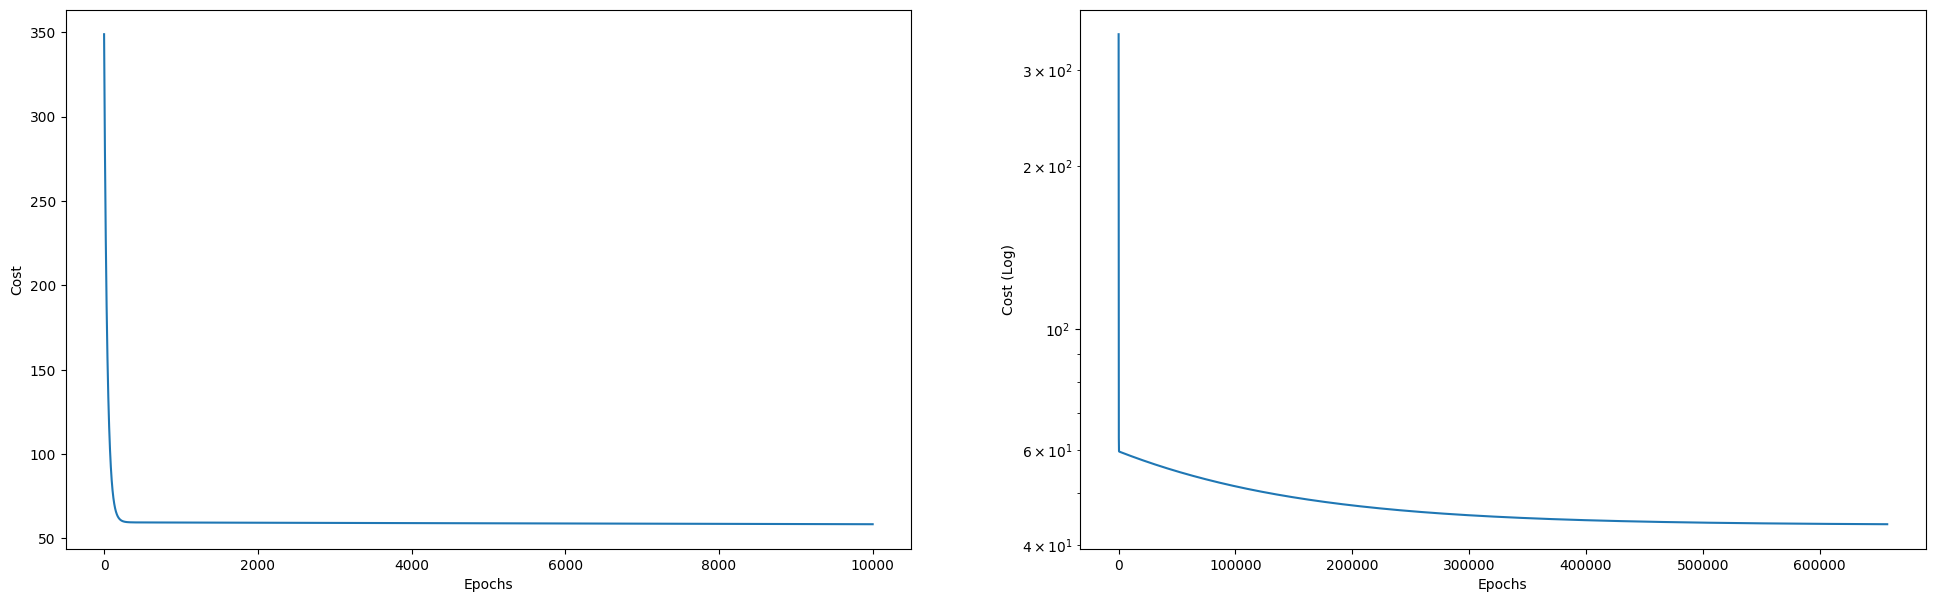

In [48]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 7))  # Two subplots, one abo
ax1.plot(np.arange(epoch)[:10000], cost_history[:10000])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Cost")


ax2.plot(np.arange(epoch), cost_history)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Cost (Log)")
ax2.set_yscale('log')

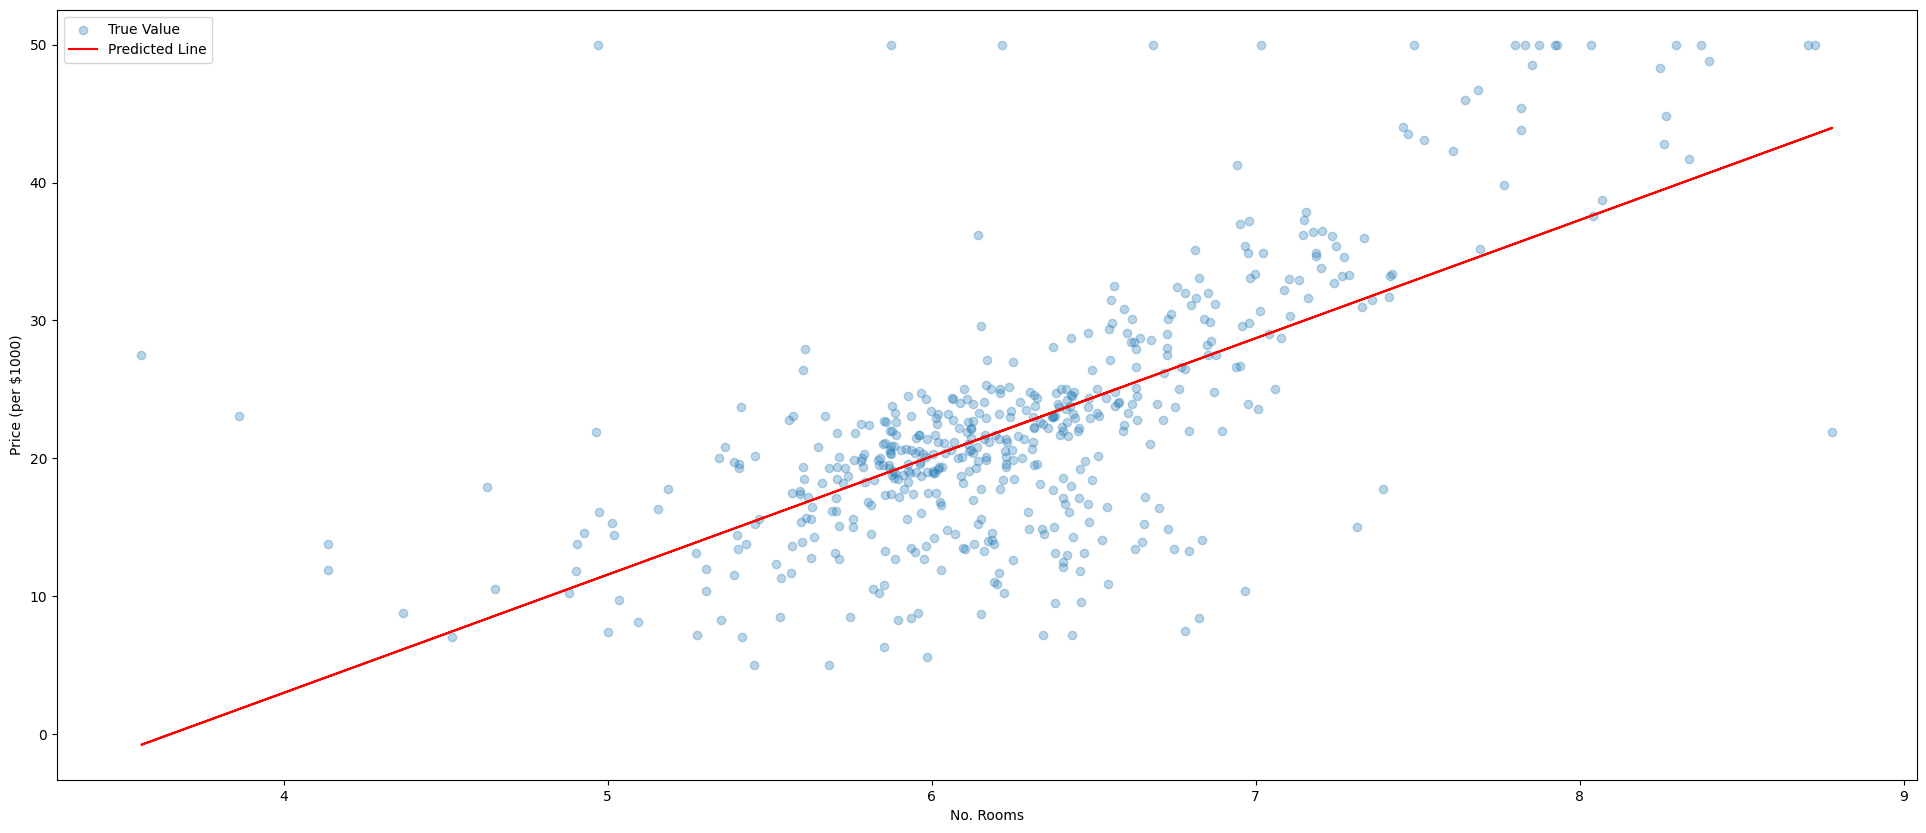

In [50]:
pred_y = hypothesis(X, weights)


plt.figure(figsize=(24, 10))
plt.scatter(X[:,1], y, alpha=0.3, label= 'True Value')
plt.plot(X[:,1], pred_y, c= 'red', label = 'Predicted Line')

plt.xlabel("No. Rooms")
plt.ylabel("Price (per $1000)")
plt.legend()

